In [1]:
# Setting up shop to explore a dataset on movies
import math
import statistics
import scipy.stats
import pandas as pd
import seaborn as sis
import numpy as np
import plotly.express as px
from ast import literal_eval
from datetime import datetime
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
df=pd.read_csv(r'/Users/mrm/Python/movies.csv')

In [2]:
# Exploring the first 10 rows of the dataset
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
# Exploring the last 10 rows of the dataset
df.tail(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [4]:
# Extracting year of release from the “released” column due to inconsistencies with the “year” column
df['year2'] = df['released'].str.extract(r'(\d{4})', expand=False)

In [5]:
# Extracting country from the “released” column due to inconsistencies with the “country” column
df['country2'] = df['released'].str.extract(r'\((.*)\)', expand=False)

In [6]:
# Verification of the new columns
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year2,country2
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,United States
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980,United States
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980,United States
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980,United States
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981,United States
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980,United States


In [7]:
# Dropping old year and country  columns
df.drop(columns=['year','country','released'], inplace=True)

In [8]:
# Verification of all columns
df.head(10)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,year2,country2
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98.0,1980,United States
5,Friday the 13th,R,Horror,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,550000.0,39754601.0,Paramount Pictures,95.0,1980,United States
6,The Blues Brothers,R,Action,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,27000000.0,115229890.0,Universal Pictures,133.0,1980,United States
7,Raging Bull,R,Biography,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980,United States
8,Superman II,PG,Action,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,54000000.0,108185706.0,Dovemead Films,127.0,1981,United States
9,The Long Riders,R,Biography,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,10000000.0,15795189.0,United Artists,100.0,1980,United States


In [9]:
# Getting more information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   score     7665 non-null   float64
 4   votes     7665 non-null   float64
 5   director  7668 non-null   object 
 6   writer    7665 non-null   object 
 7   star      7667 non-null   object 
 8   budget    5497 non-null   float64
 9   gross     7479 non-null   float64
 10  company   7651 non-null   object 
 11  runtime   7664 non-null   float64
 12  year2     7666 non-null   object 
 13  country2  7666 non-null   object 
dtypes: float64(5), object(9)
memory usage: 838.8+ KB
None


In [11]:
# Counting duplicates in the dataset
sum(df.duplicated())

0

In [12]:
# Counting null values per columns
df.isnull().sum()

name           0
rating        77
genre          0
score          3
votes          3
director       0
writer         3
star           1
budget      2171
gross        189
company       17
runtime        4
year2          2
country2       2
dtype: int64

In [13]:
# Describing the dataset with null values
df.describe()

,score,votes,budget,gross,runtime
count,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [14]:
# Dropping rows with at least one null value
df = df.dropna()

In [15]:
# Describing the dataset with no null values
df.describe()

,score,votes,budget,gross,runtime
count,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [16]:
# Converting floating points to integer values
df.votes = df.votes.astype(int)
df.budget = df.budget.astype(int)
df.gross = df.gross.astype(int)
df.runtime = df.runtime.astype(int)

In [17]:
# Changing year2’s datetype from object for future analysis
df['year2'] = df['year2'].astype(int)

In [18]:
# Rechecking data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   score     5421 non-null   float64
 4   votes     5421 non-null   int64  
 5   director  5421 non-null   object 
 6   writer    5421 non-null   object 
 7   star      5421 non-null   object 
 8   budget    5421 non-null   int64  
 9   gross     5421 non-null   int64  
 10  company   5421 non-null   object 
 11  runtime   5421 non-null   int64  
 12  year2     5421 non-null   int64  
 13  country2  5421 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 635.3+ KB
None


In [20]:
# Identifying the top 10 movies with the highest gross revenue
df.sort_values('gross', ascending=False).head(10)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,year2,country2
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162,2009,United States
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181,2019,United States
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138,2015,United States
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149,2018,United States
7480,The Lion King,PG,Animation,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,260000000,1670727580,Walt Disney Pictures,118,2019,United States
6653,Jurassic World,PG-13,Action,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,150000000,1670516444,Universal Pictures,124,2015,United States
6043,The Avengers,PG-13,Action,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,220000000,1518815515,Marvel Studios,143,2012,United States
6646,Furious 7,PG-13,Action,7.1,370000,James Wan,Chris Morgan,Vin Diesel,190000000,1515341399,Universal Pictures,137,2015,United States
7494,Frozen II,PG,Animation,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,150000000,1450026933,Walt Disney Animation Studios,103,2019,United States


In [21]:
# Identifying the top 10 priciest movies
df.sort_values('budget', ascending=False).head(10)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,year2,country2
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181,2019,United States
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149,2018,United States
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,317000000,1332698830,Walt Disney Pictures,152,2017,United States
7066,Justice League,PG-13,Action,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,300000000,657926987,Warner Bros.,120,2017,United States
5060,Pirates of the Caribbean: at World's End,PG-13,Action,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,300000000,960996492,Walt Disney Pictures,169,2007,United States
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,6.5,394000,J.J. Abrams,Chris Terrio,Daisy Ridley,275000000,1078232589,Walt Disney Pictures,141,2019,United States
7261,Solo: A Star Wars Story,PG-13,Action,6.9,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,275000000,392924807,Lucasfilm,135,2018,United States
4870,Superman Returns,PG-13,Action,6.0,274000,Bryan Singer,Michael Dougherty,Brandon Routh,270000000,391081192,Warner Bros.,154,2006,United States
7480,The Lion King,PG,Animation,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,260000000,1670727580,Walt Disney Pictures,118,2019,United States
5658,Tangled,PG,Animation,7.7,417000,Nathan Greno,Dan Fogelman,Mandy Moore,260000000,592462816,Walt Disney Animation Studios,100,2010,United States


In [22]:
# Identifying the top 10 highly scored movies
df.sort_values('score', ascending=False).head(10)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,year2,country2
2443,The Shawshank Redemption,R,Drama,9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,25000000,28817291,Castle Rock Entertainment,142,1994,United States
5243,The Dark Knight,PG-13,Action,9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,185000000,1005973645,Warner Bros.,152,2008,United States
2247,Schindler's List,R,Biography,8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,22000000,322161245,Universal Pictures,195,1994,United States
2444,Pulp Fiction,R,Crime,8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,8000000,213928762,Miramax,154,1994,United States
4245,The Lord of the Rings: The Return of the King,PG-13,Action,8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,94000000,1146030912,New Line Cinema,201,2003,United States
5643,Inception,PG-13,Action,8.8,2100000,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,160000000,836836967,Warner Bros.,148,2010,United States
2445,Forrest Gump,PG-13,Drama,8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,55000000,678226133,Paramount Pictures,142,1994,United States
3444,Fight Club,R,Drama,8.8,1900000,David Fincher,Chuck Palahniuk,Brad Pitt,63000000,101209702,Fox 2000 Pictures,139,1999,United States
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,8.8,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,93000000,897690072,New Line Cinema,178,2001,United States
3443,The Matrix,R,Action,8.7,1700000,Lana Wachowski,Lilly Wachowski,Keanu Reeves,63000000,466364845,Warner Bros.,136,1999,United States


In [23]:
# Identifying the top 10 longest movies
df.sort_values('runtime', ascending=False).head(10)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,year2,country2
2280,Gettysburg,PG,Drama,7.6,27000,Ron Maxwell,Michael Shaara,Tom Berenger,25000000,10769960,TriStar Television,271,1993,United States
2888,Hamlet,PG-13,Drama,7.7,37000,Kenneth Branagh,William Shakespeare,Kenneth Branagh,18000000,4770222,Castle Rock Entertainment,242,1996,United States
479,Once Upon a Time in America,R,Crime,8.4,321000,Sergio Leone,Harry Grey,Robert De Niro,30000000,5473212,The Ladd Company,229,1984,United States
21,Heaven's Gate,R,Adventure,6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,44000000,3484523,Partisan Productions,219,1981,United States
4343,Gods and Generals,PG-13,Biography,6.3,16000,Ron Maxwell,Jeff Shaara,Stephen Lang,56000000,12923936,Turner Pictures (I),219,2003,United States
3989,Kabhi Khushi Kabhie Gham...,Not Rated,Drama,7.4,46000,Karan Johar,Karan Johar,Shah Rukh Khan,7500000,11334547,Dharma Productions,210,2001,United States
7465,The Irishman,R,Biography,7.8,344000,Martin Scorsese,Steven Zaillian,Robert De Niro,159000000,968853,Tribeca Productions,209,2019,United States
2082,Malcolm X,PG-13,Biography,7.7,89000,Spike Lee,Alex Haley,Denzel Washington,33000000,48169910,Largo International N.V.,202,1992,United States
4245,The Lord of the Rings: The Return of the King,PG-13,Action,8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,94000000,1146030912,New Line Cinema,201,2003,United States
2247,Schindler's List,R,Biography,8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,22000000,322161245,Universal Pictures,195,1994,United States


In [24]:
# Identifying the top 10 most voted movies
df.sort_values('votes', ascending=False).head(10)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,year2,country2
5243,The Dark Knight,PG-13,Action,9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,185000000,1005973645,Warner Bros.,152,2008,United States
2443,The Shawshank Redemption,R,Drama,9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,25000000,28817291,Castle Rock Entertainment,142,1994,United States
5643,Inception,PG-13,Action,8.8,2100000,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,160000000,836836967,Warner Bros.,148,2010,United States
2445,Forrest Gump,PG-13,Drama,8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,55000000,678226133,Paramount Pictures,142,1994,United States
3444,Fight Club,R,Drama,8.8,1900000,David Fincher,Chuck Palahniuk,Brad Pitt,63000000,101209702,Fox 2000 Pictures,139,1999,United States
2444,Pulp Fiction,R,Crime,8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,8000000,213928762,Miramax,154,1994,United States
4245,The Lord of the Rings: The Return of the King,PG-13,Action,8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,94000000,1146030912,New Line Cinema,201,2003,United States
3443,The Matrix,R,Action,8.7,1700000,Lana Wachowski,Lilly Wachowski,Keanu Reeves,63000000,466364845,Warner Bros.,136,1999,United States
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,8.8,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,93000000,897690072,New Line Cinema,178,2001,United States
6047,The Dark Knight Rises,PG-13,Action,8.4,1600000,Christopher Nolan,Jonathan Nolan,Christian Bale,250000000,1081142612,Warner Bros.,164,2012,United States


In [25]:
# Examining number of movies per genre
df["genre"].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

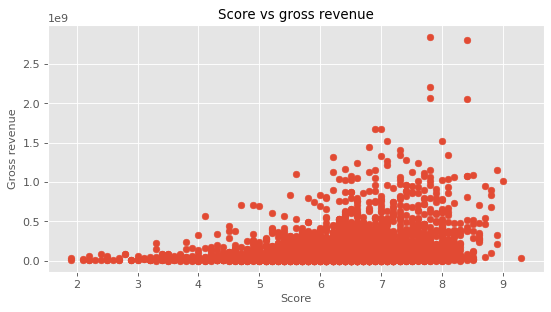

In [31]:
# Plotting the relation between score and revenue
x = df['score']
y = df['gross'] 
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(x,y)
plt.title('Score vs gross revenue',fontsize=12)
plt.xlabel('Score',fontsize=10)
plt.ylabel('Gross revenue',fontsize=10)
plt.show()

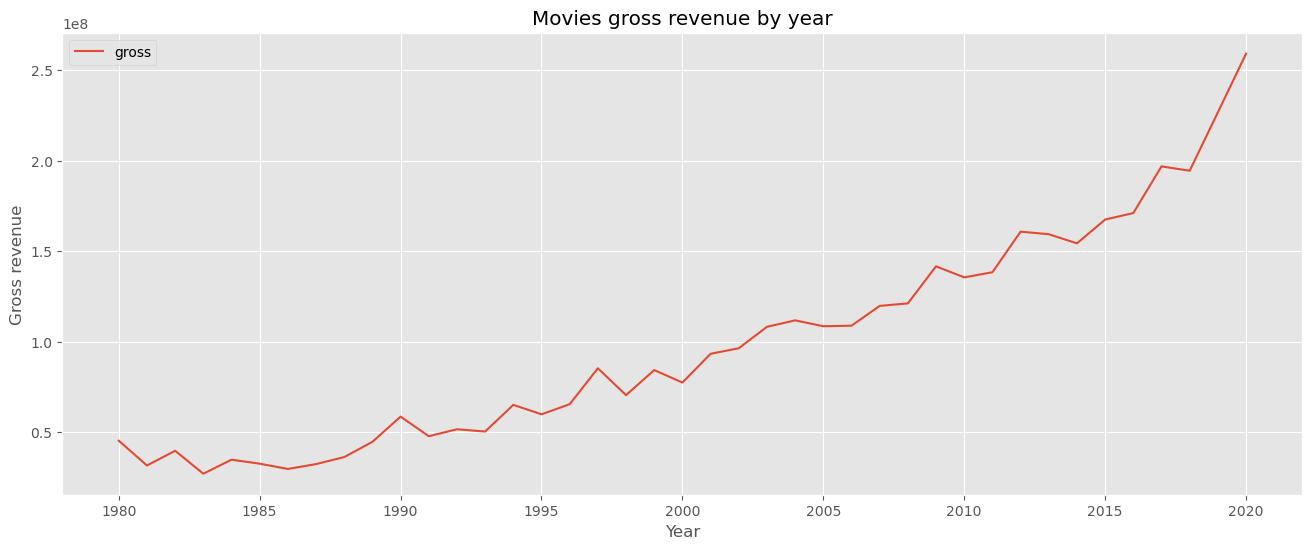

In [32]:
# Plotting gross revenue by year
year_rev = (df[['year2','gross']].groupby('year2').mean())
year_rev.plot(figsize=(16,6))
plt.title('Movies gross revenue by year')
plt.ylabel('Gross revenue')
plt.xlabel('Year')
plt.show()

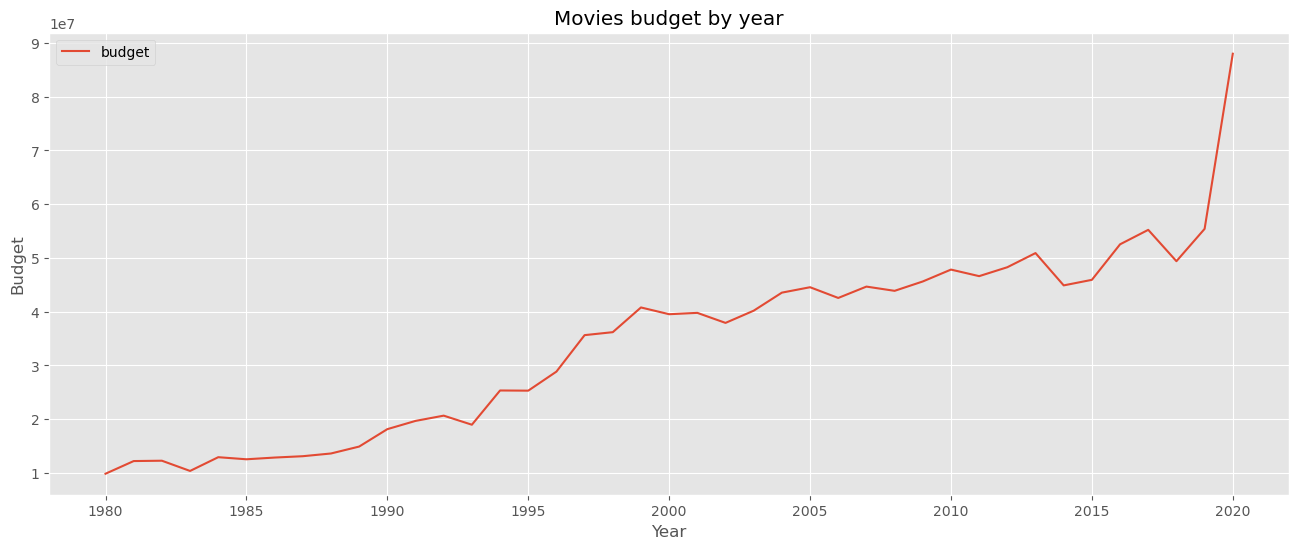

In [33]:
#Plotting budget by year
year_rev = (df[['year2','budget']].groupby('year2').mean())
year_rev.plot(figsize=(16,6))
plt.title('Movies budget by year')
plt.ylabel('Budget')
plt.xlabel('Year')
plt.show()

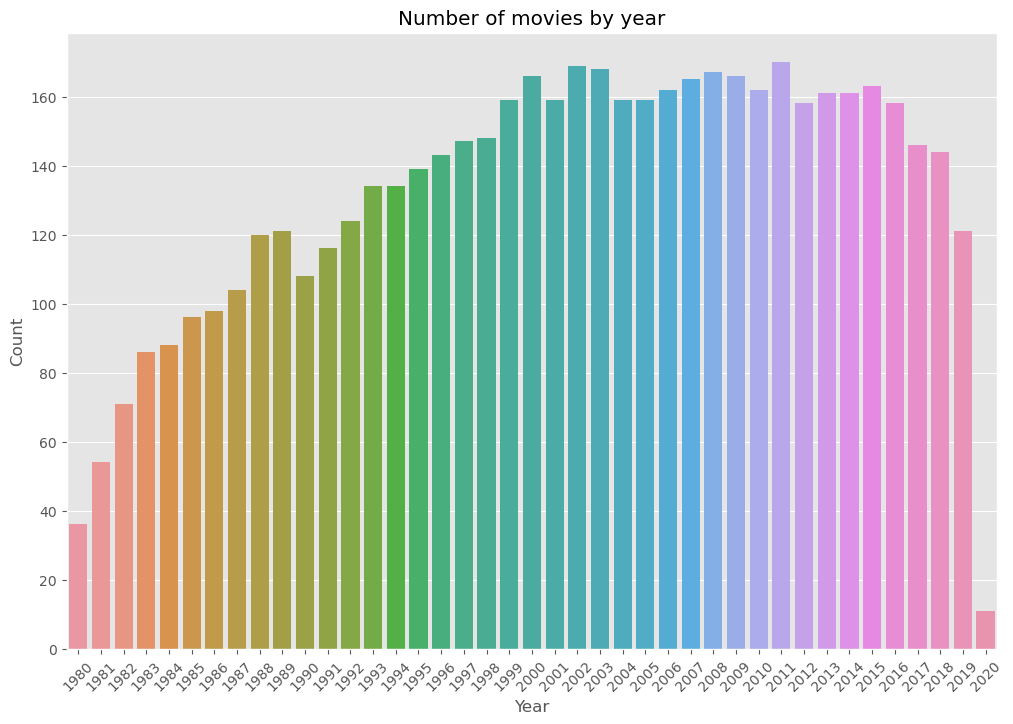

In [34]:
#Plotting number of movies by year
import seaborn as sns
sns.countplot(x='year2', data=df)
plt.title('Number of movies by year')
plt.ylabel('Count')
plt.xlabel('Year',)
plt.xticks(rotation=45)
plt.show()

In [35]:
# Examining score prediction based on budget, runtime, and votes
X = df[['budget','runtime', 'votes']]
y = df['score']
reg = LinearRegression()
reg.fit(X, y)
results = sm.OLS(y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  score   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          6.601e+04
Date:                Sat, 14 Jan 2023   Prob (F-statistic):                        0.00
Time:                        17:11:21   Log-Likelihood:                         -7981.9
No. Observations:                5421   AIC:                                  1.597e+04
Df Residuals:                    5418   BIC:                                  1.599e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------